In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense  
from keras import applications   
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math  
import datetime
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Default dimensions we found online
img_width, img_height = 224, 224  
   
#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5' 

# loading up our datasets
train_data_dir = 'Downloads/data/train'  
validation_data_dir = 'Downloads/data/validation'  
test_data_dir = 'Downloads/data/test'
     
epochs = 7   
batch_size = 50  

In [3]:
#training data
from tensorflow.keras.utils import to_categorical
datagen = ImageDataGenerator(rescale=1. / 255) 
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('Downloads/data/bottleneck_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes) 

Found 13412 images belonging to 6 classes.


In [4]:
#validation data
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('Downloads/data/bottleneck_features_validation.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)  

Found 2549 images belonging to 6 classes.


In [5]:
#testing data
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('Downloads/data/bottleneck_features_test.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 1845 images belonging to 6 classes.


In [6]:
# Assuming you have 6 classes for classification
num_classes = 6

# Modify the output layer to have the correct number of units
output_layer = layers.Dense(num_classes, activation='softmax')

# Define the CNN model with the original input shape (150, 150, 3) and the modified output layer
model = Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    output_layer  # Modified output layer
])



In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 13412 images belonging to 6 classes.


In [9]:
validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 2549 images belonging to 6 classes.


In [10]:
test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1845 images belonging to 6 classes.


In [11]:

# Train the model
history=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=2,  
    validation_data=validation_generator
)

Epoch 1/2
420/420 [==============================] - 214s 501ms/step - loss: 1.2541 - accuracy: 0.5240 - val_loss: 0.9628 - val_accuracy: 0.6556
Epoch 2/2
420/420 [==============================] - 200s 476ms/step - loss: 0.8006 - accuracy: 0.7121 - val_loss: 0.7692 - val_accuracy: 0.7195


In [12]:
model.save("custom_model.h5")

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

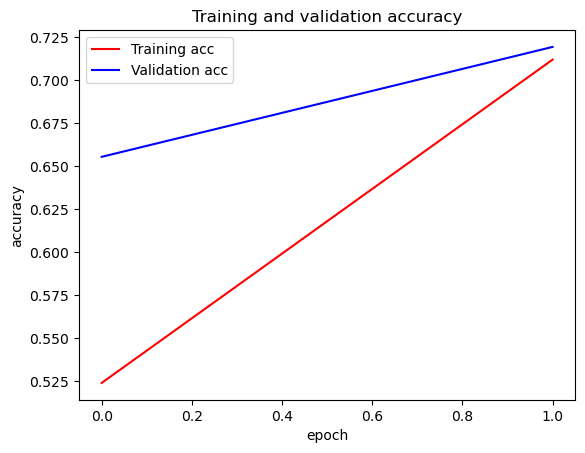

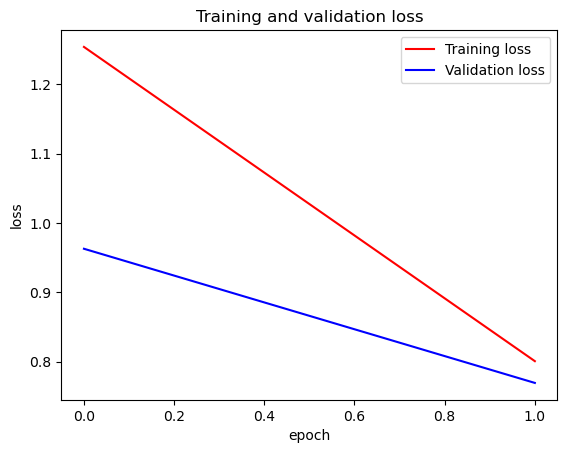

In [14]:
#Graphing our training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [15]:
model.evaluate(test_generator)

58/58 [==============================] - 10s 176ms/step - loss: 0.8095 - accuracy: 0.6965


[0.8095080256462097, 0.696476936340332]

In [16]:
print('test data', test_generator)
preds = np.round(model.predict(test_generator),0) 
print('rounded test_labels', preds)

test data <keras.src.preprocessing.image.DirectoryIterator object at 0x00000219507DE3D0>
58/58 [==============================] - 7s 122ms/step
rounded test_labels [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [17]:
animals = ['butterflies', 'chickens', 'elephants', 'horses', 'spiders', 'squirells']
classification_metrics = metrics.classification_report(test_labels, preds, target_names=animals )
print(classification_metrics)

              precision    recall  f1-score   support

 butterflies       0.21      0.12      0.15       371
    chickens       0.12      0.18      0.15       203
   elephants       0.07      0.05      0.06       152
      horses       0.25      0.16      0.19       472
     spiders       0.20      0.19      0.19       403
   squirells       0.10      0.05      0.07       244

   micro avg       0.18      0.14      0.15      1845
   macro avg       0.16      0.12      0.13      1845
weighted avg       0.18      0.14      0.15      1845
 samples avg       0.14      0.14      0.14      1845



C:\Users\sundh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)

In [19]:
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

In [20]:
#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Normalized confusion matrix


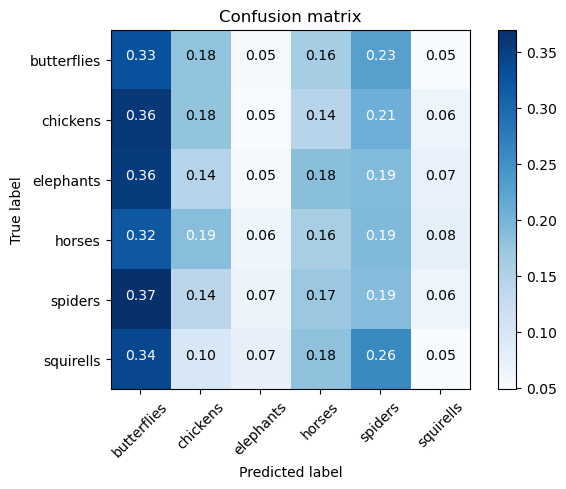

In [21]:
#Those numbers are all over the place. Now turning normalize= True
plot_confusion_matrix(confusion_matrix, 
                      ['butterflies', 'chickens', 'elephants', 'horses', 'spiders', 'squirells'],
                     normalize=True)

In [22]:
from keras.preprocessing import image
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import numpy as np
import time

# Load the MobileNetV2 model with pre-trained weights
model = MobileNetV2(weights='imagenet')

# Load and preprocess the image
img = image.load_img('Downloads/data/test/butterfly.jpg', target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make a prediction
predictions = model.predict(img_array)

# Decode the predictions to get class labels
decoded_predictions = decode_predictions(predictions, top=6)[0]

custom_labels = ['butterflies', 'chickens', 'elephants', 'horses', 'spiders', 'squirells']
custom_scores = []

for i, (_, imagenet_label, score) in enumerate(decoded_predictions):
    custom_label = custom_labels[i]
    custom_scores.append(score * 100)

# Print the custom labels and scores
for i, (custom_label, score) in enumerate(zip(custom_labels, custom_scores)):
    print("ID: {}, Label: {}, Score: {:.2f}%".format(i, custom_label, score))

print('Final Decision:')
time.sleep(0.5)
for x in range(3):
    print('.' * (x + 1))
    time.sleep(0.2)

max_score_index = custom_scores.index(max(custom_scores))
max_score_label = custom_labels[max_score_index]
max_score = custom_scores[max_score_index]

print("Label with the highest score: {}, Score: {:.2f}%".format(max_score_label, max_score))


1/1 [==============================] - 1s 1s/step
ID: 0, Label: butterflies, Score: 94.76%
ID: 1, Label: chickens, Score: 0.20%
ID: 2, Label: elephants, Score: 0.19%
ID: 3, Label: horses, Score: 0.10%
ID: 4, Label: spiders, Score: 0.06%
ID: 5, Label: squirells, Score: 0.05%
Final Decision:
.
..
...
Label with the highest score: butterflies, Score: 94.76%
